In [14]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [15]:
# Load MNIST dataset
mnist = fetch_openml('mnist_784')
X, y = mnist['data'].to_numpy(), mnist['target']

# Reshape images into column vectors
X_flattened = X.reshape(X.shape[0], -1)

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_flattened)

# Perform SVD
U, s, Vt = np.linalg.svd(X_standardized, full_matrices=False)

# Choose the number of dimensions (k) to keep
k = 50

In [5]:
# Reduce the dimensionality of the U, s, and Vt matrices
U_reduced = U[:, :k]
s_reduced = s[:k]
Vt_reduced = Vt[:k, :]

# Reconstruct the reduced data
X_reduced = U_reduced @ np.diag(s_reduced) @ Vt_reduced
X_reduced.reshape(X_reduced.shape[0], -1)

X_standardized = scaler.fit_transform(X_reduced)

# Perform SVD
U, s, Vt = np.linalg.svd(X_standardized_reduced, full_matrices=False)

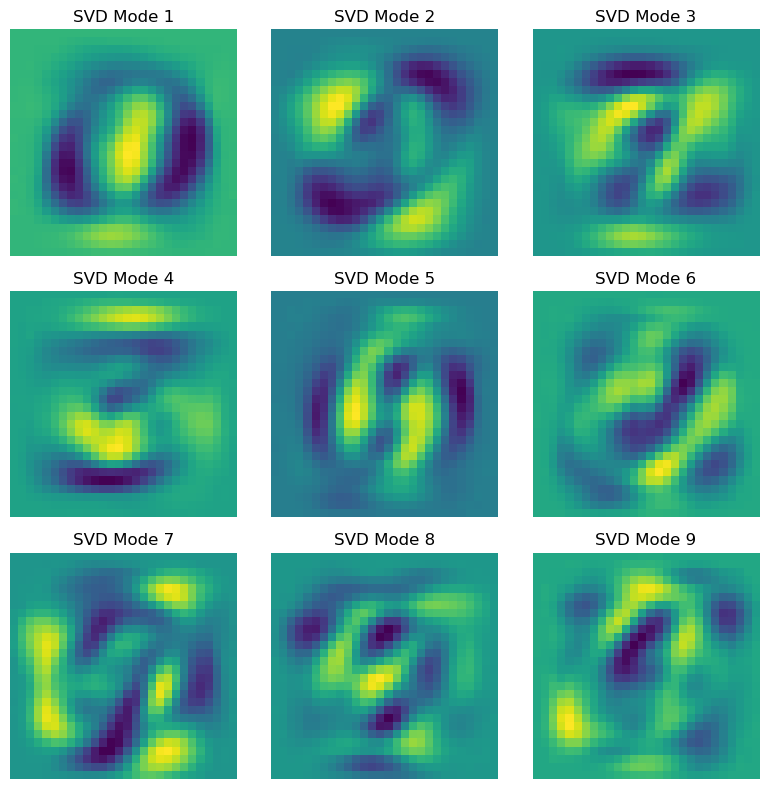

In [16]:
# Plot the 9 most important SVD modes (eigen-digits)
num_modes = 9
fig, axes = plt.subplots(3, 3, figsize=(8, 8))

for i, ax in enumerate(axes.flat):
    eigen_digit = Vt[i].reshape(28, 28)
    ax.imshow(eigen_digit)
    ax.set_title(f'SVD Mode {i + 1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

Each image represents an "eigen-digit", U, corresponding to one of the 9 most important modes in the MNIST dataset.

In [17]:
# Calculate the number of modes required for good image reconstruction
energy = np.sum(s**2)
cumulative_energy = np.cumsum(s**2)
r = np.argmax(cumulative_energy / energy > 0.9)

# Project data onto selected V-modes
selected_modes = [1, 2, 4]  # Using 1-based indexing
X_projected = X_standardized @ Vt[([mode - 1 for mode in selected_modes]), :].T

# Print the number of modes required for good image reconstruction
print(f"The number of modes (rank r) necessary for good image reconstruction is {r}.")

The number of modes (rank r) necessary for good image reconstruction is 237.


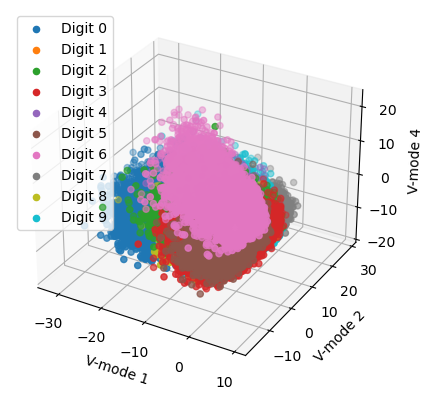

In [18]:
# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for digit in range(10):
    indices = (y == str(digit))
    ax.scatter(X_projected[indices, 0], X_projected[indices, 1], X_projected[indices, 2], label=f'Digit {digit}')

ax.set_xlabel(f'V-mode {selected_modes[0]}')
ax.set_ylabel(f'V-mode {selected_modes[1]}')
ax.set_zlabel(f'V-mode {selected_modes[2]}')
ax.legend()
plt.show()

## Pick two digits. See if you can build a linear classifier (LDA) that can reasonable identify/classify them.

In [19]:
# Filter the dataset to keep only the digits 4 and 5
selected_digits = ['4', '5']
mask = np.isin(y, selected_digits)
X_filtered, y_filtered = X[mask], y[mask]

# Reshape images into column vectors
X_flattened = X_filtered.reshape(X_filtered.shape[0], -1)

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_flattened)

# Split the dataset into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y_filtered, test_size=0.2, random_state=42)

# Perform LDA and fit the classifier
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Evaluate the classifier on the test set
y_pred = lda.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(cm)

accuracy_4 = cm[0, 0] / cm[0].sum()
accuracy_5 = cm[1, 1] / cm[1].sum()

print(f"Accuracy for digit 4: {accuracy_4:.2f}")
print(f"Accuracy for digit 5: {accuracy_5:.2f}")


Classification Report:
              precision    recall  f1-score   support

           4       0.99      0.99      0.99      1342
           5       0.98      0.99      0.99      1286

    accuracy                           0.99      2628
   macro avg       0.99      0.99      0.99      2628
weighted avg       0.99      0.99      0.99      2628

Confusion Matrix:
[[1322   20]
 [  14 1272]]
Accuracy for digit 4: 0.99
Accuracy for digit 5: 0.99


## Pick three digits. Try to build a linear classifier to identify these three now.

In [21]:
# Filter the dataset to keep only the digits 1, 4, and 7
selected_digits = ['0', '1', '2']
mask = np.isin(y, selected_digits)
X_filtered, y_filtered = X[mask], y[mask]

# Reshape images into column vectors
X_flattened = X_filtered.reshape(X_filtered.shape[0], -1)

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_flattened)

# Split the dataset into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y_filtered, test_size=0.2, random_state=42)

# Perform LDA and fit the classifier
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Evaluate the classifier on the test set
y_pred = lda.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(cm)

accuracy_0 = cm[0, 0] / cm[0].sum()
accuracy_1 = cm[1, 1] / cm[1].sum()
accuracy_2 = cm[2, 2] / cm[2].sum()

print(f"Accuracy for digit 0: {accuracy_0:.2f}")
print(f"Accuracy for digit 1: {accuracy_1:.2f}")
print(f"Accuracy for digit 2: {accuracy_2:.2f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1386
           1       1.00      0.74      0.85      1592
           2       0.75      0.98      0.85      1376

    accuracy                           0.89      4354
   macro avg       0.91      0.90      0.89      4354
weighted avg       0.91      0.89      0.89      4354

Confusion Matrix:
[[1355    0   31]
 [   4 1173  415]
 [  28    5 1343]]
Accuracy for digit 0: 0.98
Accuracy for digit 1: 0.74
Accuracy for digit 2: 0.98


## Determining the easiest and most difficult digits to separate: 

In [22]:
digit_pairs = list(itertools.combinations(range(10), 2))
accuracies = []

for digit_pair in digit_pairs:
    selected_digits = [str(d) for d in digit_pair]
    mask = np.isin(y, selected_digits)
    X_filtered, y_filtered = X[mask], y[mask]

    X_flattened = X_filtered.reshape(X_filtered.shape[0], -1)
    scaler = StandardScaler()
    X_standardized = scaler.fit_transform(X_flattened)

    X_train, X_test, y_train, y_test = train_test_split(X_standardized, y_filtered, test_size=0.2, random_state=42)

    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train)

    y_pred = lda.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    accuracy_1 = cm[0, 0] / cm[0].sum()
    accuracy_2 = cm[1, 1] / cm[1].sum()
    avg_accuracy = (accuracy_1 + accuracy_2) / 2

    accuracies.append(avg_accuracy)
    print(f"Accuracy for digit pair {digit_pair}: {avg_accuracy:.2f}")

min_index = np.argmin(accuracies)
max_index = np.argmax(accuracies)

print(f"Most difficult pair to separate: {digit_pairs[min_index]}, accuracy: {accuracies[min_index]:.2f}")
print(f"Easiest pair to separate: {digit_pairs[max_index]}, accuracy: {accuracies[max_index]:.2f}")

Accuracy for digit pair (0, 1): 0.99
Accuracy for digit pair (0, 2): 0.99
Accuracy for digit pair (0, 3): 0.99
Accuracy for digit pair (0, 4): 0.99
Accuracy for digit pair (0, 5): 0.99
Accuracy for digit pair (0, 6): 0.99
Accuracy for digit pair (0, 7): 0.99
Accuracy for digit pair (0, 8): 0.99
Accuracy for digit pair (0, 9): 0.99
Accuracy for digit pair (1, 2): 0.98
Accuracy for digit pair (1, 3): 0.98
Accuracy for digit pair (1, 4): 0.99
Accuracy for digit pair (1, 5): 0.99
Accuracy for digit pair (1, 6): 0.99
Accuracy for digit pair (1, 7): 0.99
Accuracy for digit pair (1, 8): 0.96
Accuracy for digit pair (1, 9): 0.99
Accuracy for digit pair (2, 3): 0.97
Accuracy for digit pair (2, 4): 0.98
Accuracy for digit pair (2, 5): 0.97
Accuracy for digit pair (2, 6): 0.75
Accuracy for digit pair (2, 7): 0.98
Accuracy for digit pair (2, 8): 0.97
Accuracy for digit pair (2, 9): 0.98
Accuracy for digit pair (3, 4): 0.99
Accuracy for digit pair (3, 5): 0.95
Accuracy for digit pair (3, 6): 0.99
A

In [25]:
# Split the dataset into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate the SVM classifier
svm = SVC(kernel='rbf', C=1, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM classifier accuracy: {accuracy_svm:.2f}")

SVM classifier accuracy: 0.98


In [26]:
# Train and evaluate the Decision Tree classifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
print(f"Decision Tree classifier accuracy: {accuracy_dtree:.2f}")

Decision Tree classifier accuracy: 0.87


In [28]:
def evaluate_classifier_accuracy(classifier, X_train, y_train, X_test, y_test):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    accuracies = [cm[i, i] / cm[i].sum() for i in range(cm.shape[0])]
    avg_accuracy = np.mean(accuracies)
    return avg_accuracy

digit_pairs = list(itertools.combinations(range(10), 2))

svm_accuracies = []
dtree_accuracies = []

for digit_pair in digit_pairs:
    selected_digits = [str(d) for d in digit_pair]
    mask = np.isin(y, selected_digits)
    X_filtered, y_filtered = X[mask], y[mask]

    X_flattened = X_filtered.reshape(X_filtered.shape[0], -1)
    scaler = StandardScaler()
    X_standardized = scaler.fit_transform(X_flattened)

    X_train, X_test, y_train, y_test = train_test_split(X_standardized, y_filtered, test_size=0.2, random_state=42)

    svm = SVC(kernel='rbf', C=1, random_state=42)
    svm_accuracy = evaluate_classifier_accuracy(svm, X_train, y_train, X_test, y_test)
    svm_accuracies.append(svm_accuracy)

    dtree = DecisionTreeClassifier(random_state=42)
    dtree_accuracy = evaluate_classifier_accuracy(dtree, X_train, y_train, X_test, y_test)
    dtree_accuracies.append(dtree_accuracy)

    print(f"Accuracy for digit pair {digit_pair} - SVM: {svm_accuracy:.2f}, Decision Tree: {dtree_accuracy:.2f}")

svm_min_index = np.argmin(svm_accuracies)
svm_max_index = np.argmax(svm_accuracies)

dtree_min_index = np.argmin(dtree_accuracies)
dtree_max_index = np.argmax(dtree_accuracies)

print(f"SVM - Most difficult pair to separate: {digit_pairs[svm_min_index]}, accuracy: {svm_accuracies[svm_min_index]:.2f}")
print(f"SVM - Easiest pair to separate: {digit_pairs[svm_max_index]}, accuracy: {svm_accuracies[svm_max_index]:.2f}")

print(f"Decision Tree - Most difficult pair to separate: {digit_pairs[dtree_min_index]}, accuracy: {dtree_accuracies[dtree_min_index]:.2f}")
print(f"Decision Tree - Easiest pair to separate: {digit_pairs[dtree_max_index]}, accuracy: {dtree_accuracies[dtree_max_index]:.2f}")


Accuracy for digit pair (0, 1) - SVM: 0.99, Decision Tree: 1.00
Accuracy for digit pair (0, 2) - SVM: 0.99, Decision Tree: 0.98
Accuracy for digit pair (0, 3) - SVM: 0.99, Decision Tree: 0.99
Accuracy for digit pair (0, 4) - SVM: 0.99, Decision Tree: 0.99
Accuracy for digit pair (0, 5) - SVM: 0.99, Decision Tree: 0.99
Accuracy for digit pair (0, 6) - SVM: 0.99, Decision Tree: 0.98
Accuracy for digit pair (0, 7) - SVM: 0.99, Decision Tree: 0.99
Accuracy for digit pair (0, 8) - SVM: 0.99, Decision Tree: 0.98
Accuracy for digit pair (0, 9) - SVM: 0.99, Decision Tree: 0.98
Accuracy for digit pair (1, 2) - SVM: 0.99, Decision Tree: 0.98
Accuracy for digit pair (1, 3) - SVM: 0.99, Decision Tree: 0.98
Accuracy for digit pair (1, 4) - SVM: 0.99, Decision Tree: 0.99
Accuracy for digit pair (1, 5) - SVM: 0.99, Decision Tree: 0.99
Accuracy for digit pair (1, 6) - SVM: 0.99, Decision Tree: 0.99
Accuracy for digit pair (1, 7) - SVM: 0.99, Decision Tree: 0.99
Accuracy for digit pair (1, 8) - SVM: 0.